In [1]:
import sys
import time
import matplotlib.pyplot as plt
from random import shuffle
from skip_list import SkipList
from bloom_filter import BloomFilter

# Probabilistic data structures
## Kaloyan Kulov
### Final project

Before we start talking about probabilistic data structure, we need to understand what is a data structure.
## What is data structure?
In computer science, a data structure is a specialized format for organizing, processing, retrieving and storing data. There are several types of data structures, which are designed to arrange data to suit a specific purpose.

And after we understood what is a data structure, let's figure out what is a probabilistic data structure.
## What is a probabilistic data structure?
The simple answer to this question is that probabilistic data structures provide us with an approximate solution, which may or may not be the exact answer, but it's close to the real one. They rely on some form of probablity such as using randomness, hasing, and etc to reach that approximate solution also they are proven to use either a fixed or sublinear memory and have constant execution time.

But what makes probabilistic data structures so special, what are their advantages?
### What advantages do these structures provide?
Because of their probabilsitc behaviour and the fact that they don't give you an exact answer, instead they provide you with a reasonable approximation of the it and a way to approximate this estimation, that's why they are extremely useful for big data and streaming application because they allow to dramatically decrease the amount of memory needed (in comparison to data structures that give you exact answers). Another advantage is that, these algorithms use much less memory and have constant query time and usually support union and intersection operations, so they can be easily parallelized.

In many cases these data structures are using hash functions to randomize the items, because they ignore collisions, they keep the size constant, but this is also the reason, why they can't give you exact values. 

So the main advantages of using probabilistic data structures are that:
- they use small amount of memory (you can control how much)
- they can be easily parallelizable (hashes are independent)
- they have constant query time (not even amortized constant like in dictionary)

The first probabilistic data structure, that I will talk about is bloom filter.
## Bloom Filter
The Bloom filter is a space-efficient probabilistic data structure that is used to test whether an element is a member of a set. The price we pay for efficiency is that it is probabilistic in nature, that means, there might be some False Positive results. 

### What is a False Positve?
There are some cases, where two element could refer to the same array position. In those cases the second item doesn't change it array position value, but the first item would have set its value as 1. Therefore in these cases even if the element isn't presented in the set, its existence is returned as 1. For example, it might tell that given username is already taken but actually it’s not.

Bloom filters are both fast and space-efficient. However, elements can only be added, not removed. For example, checking availability of username is set membership problem, where the set is the list of all registered username.

To work with a bloom filter, you need to provide him with these three inputs:
* m: size of the bit array
* n: estimated insertion
* p: false positive probability

To understand bloom filters better, you must know what is hashing.
### What is a Hashing?
A hash function takes input and outputs a unique identifier of fixed length which is used for identification of input.It is a function that takes a set of inputs of any arbitrary size and fits them into a table or other data structure that contains fixed-size elements.

### How does the structure work?
In general, we start with an empty bloom filter, which is a bit array of m bits, all set to 0. There are also k different hash functions, each of which maps a set element to one of the m bit positions.
* To add an element, feed it to the hash functions to get k bit positions, and set the bits at these positions to 1.
* To test if an element is in the set, feed it to the hash functions to get k bit positions.
    * If any of the bits at these positions is 0, the element definitely isn’t the set.
    * If all are 1, then the element may be in the set.

To illustrate it more clearlu, I will demonstrate an example below.

##### Example
First of all an empty bloom filter is a bit array of m bits, all set to zero, like these one:

<img style="width:60%;" src="Images/bloom_filter1.png">

For us, to calculate the hashes for a given input, we will need **k** number of hash functions.When we want to add an item in the filter, the bits at **k** indexes h1(x), h2(x), … hk(x) are set, where indexes are calculated using hash functions. For example, let's suppose we want to enter the word **“geeks”** in the filter. We are using **3** hash functions and a bit array of length **10**, all set to **0** initially. First we’ll calculate the hashes as following:<br><br>

<center>
    <b>
    h1("geeks") % 10 = 1 <br>
    h1("geeks") % 10 = 4 <br>
    h1("geeks") % 10 = 7 <br>
    </b>
</center>

Now we are going to set the elements on **positions 1**, **4** and **7** to **1**.

<img style="width:60%;" src="Images/bloom_filter2.png">

And if we want to enter a word. First we will calculate the hashes.<br><br>

<center>
    <b>
    h1(“nerd”) % 10 = 3 <br>
    h2(“nerd”) % 10 = 5 <br>
    h3(“nerd”) % 10 = 4 <br>
    </b>
</center>

So we will set the indexes on **positions 3**, **5** and **4** to **1**.

<img style="width:60%;" src="Images/bloom_filter3.png">

And if we want to check if **“geeks”** is present in filter or not. We’ll do the same process but this time in **reverse order**. We calculate respective hashes using h1, h2 and h3 and check if all these indexes are set to **1** in the bit array. If all the bits are set then we can say that “geeks” **is probably present**. If any of the bit at these indexes are **0** then “geeks” **is definitely not present**.

But why do we called it probably present. Is it uncertain? Let's suppose we want to check whether “cat” is present or not. We’ll calculate hashes using h1, h2 and h3.

<center>
    <b>
    h1(“cat”) % 10 = 1 <br>
    h2(“cat”) % 10 = 3 <br>
    h3(“cat”) % 10 = 7 <br>
    </b>
</center>

If we check the bit array, bits at these indexes are set to 1 but we know that “cat” was never added to the filter. Bit at index 1 and 7 was set when we added “geeks” and bit 3 was set, when we added “nerd”.

<img style="width:60%;" src="Images/bloom_filter4.png">

So, because bits at calculated indexes are already set by some other item, bloom filter erroneously claim that “cat” is present and generating a false positive result. Depending on the application, it could be huge downside or relatively okay.

We can control the probability of getting a false positive by controlling the size of the Bloom filter. More space means fewer false positives. If we want to decrease the probability of false positive result, we have to use more number of hash functions and larger bit array. This would add latency in addition of item and checking membership. 

Now, let's see below, how is the bloom filter implemented in Python.
##### Python implementation

In [8]:
n = 50 # number of items, that we want to add
p = 0.5 # false positive probability

bloomf = BloomFilter(n,p)
print(bloomf)

word_absent = ['bluff', 'Iron Man', 'car', 'Captain America', 'war', 'Thor', 'humanity',
               'Black Widow', 'hurt', 'nuke', 'facebook', 'geeksforgeeks','twitter', 'Inception'
                'Falcon', "Rick", "Java", "asd", "asdfhgdsfhg"]

word_present = ['abound','abounds','abundance','abundant','accessable', 'bloom','blossom','bolster',
                'bonny','bonus', 'bonuses', 'coherent','cohesive','colorful','comely','comfort',
                'gems','generosity','generous','generously','genial']

bloomf.add_items_from_list(word_present)
# test_words = word_present[:10] + word_absent
# bloomf.check_items_from_list(test_words)

shuffle(word_present)
shuffle(word_absent)

test_words = word_present[:10] + word_absent
shuffle(test_words)
for word in test_words:
	if bloomf.check(word):
		if word in word_absent:
			print(f"{word} is a false positive!")
		else:
			print(f"{word} is probably present!")
	else:
		print(f"{word} is definitely not present!")


Size of bit array: 72
False positive Probability: 0.5 %
Number of hash functions: 0

comely is probably present!
bonus is probably present!
Java is a false positive!
Thor is a false positive!
asd is a false positive!
InceptionFalcon is a false positive!
cohesive is probably present!
bonuses is probably present!
Captain America is a false positive!
bolster is probably present!
colorful is probably present!
Iron Man is a false positive!
bonny is probably present!
gems is probably present!
Black Widow is a false positive!
twitter is a false positive!
Rick is a false positive!
bluff is a false positive!
war is a false positive!
hurt is a false positive!
car is a false positive!
humanity is a false positive!
geeksforgeeks is a false positive!
nuke is a false positive!
facebook is a false positive!
generously is probably present!
abound is probably present!
asdfhgdsfhg is a false positive!


Okay, now we know what is a bloom filter and how it works, but do we know what operations could we do with it?
### What operations can be done?
Operations that a Bloom Filter supports are:

* add(x) : inserts an element into the Bloom Filter.
* check(x) : checks whether an element is already present in the Bloom Filter with a positive false probability.

We know what is false positive probability, but do we know how to calculate it?
### Probability of False positivity formula
To calculate the **Probability of False positive**, marked with p, we need:
* m - size of bit array
* k - number of hash functions
* n - number of expected elements to be inserted in the Bloom Filter

We will mark false positive probability with p and can calculate it as:

$$P = (1 - [1 - \frac{1}{m}]^{kn})^k$$

Another interesting thing is how we calculate the size of bit the bit array.
### Size of Bit Array formula
To calculate the size of the bit array(**m**) we need:
* n - number of expected elements to be inserted in the Bloom Filter
* p - false positive probability

We can calculate **m** with the formula:

$$m = \frac{n\ln{P}}{(\ln2)^2}$$

One last thing, we need to consider is what is the most optimum number of hash functions and how do we calculate it?
### Number of hash functions formula
To calculate the most optimum number of hash functions(**k**), we will need:
* m - size of bit array
* n - number of expected elements to be inserted in the Bloom Filter

We'll be calculating **k** as:

$$k = \frac{m}{n}\ln{2}$$

Let's see how is the bloom filter performing.
### Blooms' Filter performance
A Bloom filter with one hash function is equivalent to ordinary hashing. Bloom filter is a generalization of hashing. It allows for more interesting design tradeoffs. The complexity to add an element or to query the filter is fixed. In other words, it's independent of how many items have been added to the filter. Bloom filter simplifies some operations. Suppose we have two filters to represents sets S1 and S2. The union of the these two sets is simply an OR operation of the two filters. Intersection of the two sets can also be approximated with the filters. Another trick is to half the size of the filter with an OR operation of the first and second halves of the filter.

#### Space advantages
Bloom filter have a spectacular space advantage over other data strucuture for representing sets, such as self-balancing binary search trees, tries, hash tables, or simple arrays or linked lists of the entries. Most of these data structures are storing at least the data items in themselves, but bloom filter don't store the data items at all. For example linked data structures require additional space, where a bloom filter with 1% error and k optimal value, need only 9.6 bits per element, regardless the size of the element. This advantage of the bloom filter is partly inherited from the arrays and from its probabilistic nature.

Anyway, if the number of potential values is small, the Bloom filter is easily surpassed by the deterministic bit array, which requires only one bit for each potential element. Hash tables gain a space and time advantage if they begin ignoring collisions and store only whether each bucket contains an value, in this case, they have effectively become Bloom filters with k = 1.

Let's check how much space bloom filter needs, in comparison to a normal list.

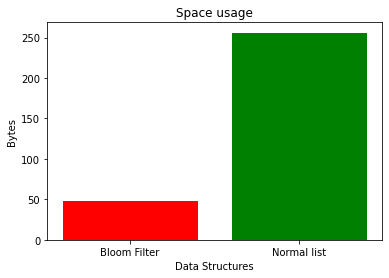

In [187]:
word_present = ['abound','abounds','abundance','abundant','accessable', 'bloom','blossom',
                'bolster','bonny','bonus','bonuses','coherent','cohesive','colorful','comely',
                'comfort','gems','generosity','generous','generously','genial']

bloomf.plot_sizeof_data_structures_compared_to_a_normal_list(word_present)

#### Time advantages
Bloom filters also have the unusual property that the time needed either to add items or to check whether an item is in the set is a fixed constant (O(k)) completely independent of the number of items already in the set. No other constant-space set data structure has this property, but the average access time of sparse hash tables can make them faster in practice than some Bloom filters. In a hardware implementation, however, the Bloom filter shines because its k lookups are independent and can be parallelized.

To understand its space efficiency, it is instructive to compare the general Bloom filter with its special case when k = 1. If k = 1, then in order to keep the false positive rate sufficiently low, a small fraction of bits should be set, which means the array must be very large and contain long runs of zeros. The information content of the array relative to its size is low. The generalized Bloom filter (k greater than 1) allows many more bits to be set while still maintaining a low false positive rate, if the parameters (k and m) are chosen well, about half of the bits will be set, and these will be apparently random, minimizing redundancy and maximizing information content.

##### Example
<img style="width:60%;" src="Images/bloom_filter5.PNG">

Finally, the Bloom Filters applications
### Bloom Filter application
Bloom filter has a large number of applications:
* Weak password detection.
* Internet Cache Protocol. 
* Safe browsing in Google Chrome.
* Wallet synchronization in Bitcoin. 
* Hash based IP Traceback.
* Cyber security like virus scanning.

##### Examples
1. Ethereum uses Bloom filters for quickly finding logs on the Ethereum blockchain.
2. Google chrome uses Bloom Filters to identify malicious websites by their URLs.
3. Bitcoin uses Bloom Filters to speed up wallet synchronization.

The second probabilistic data structure, which I am going to talk about is the skip list.
## Skip List

Let's see what is a skip list.
### What is a Skip List?
The skip list is a probabilisitc data structure, which is built upon the general idea of a linked list. It is build in layers. 

The skip list uses probability to build subsequent layers of linked lists upon an original linked list. Each additional layer of links contains fewer elements, but no new elements.

### What is the structure of the Skip List?

A skip list starts with a basic, ordered, linked list. This list is sorted, but we can't do a binary search on it because it is a linked list and we cannot index into it. But the ordering will come in handy later.

It is built in two layers: 
* The lowest layer
* Top layer.

The bottom layer is an ordinary ordered linked list and each higher layer acts as an "express lane" for the lists below, where an element in layer n appears in layer n + 1 with some fixed probability p. This probability can vary, but oftentimes 1/2 is used. Additionally, the first node in the linked list is often always kept, as a header for the new layer. On average, each element appears in 1/(1-p) lists, and the tallest element (usually a special head element at the front of the skip list) in all the lists. The skip list contains \log _{1/p}n (i.e. logarithm base 1/p of n) lists.

Take a look at the following graphics and see how some elements are kept but others are discarded. Here, it just so happened that half of the elements are kept in each new layer, but it could be more or less--it's all probabilistic. In all cases, each new layer is still ordered.

##### Example
<img style="width:60%;" src="Images/skip_list1.png">

Let's understand how does it work.
### How does Skip List work?
The idea is simple, we create multiple layers so that we can skip some nodes. The lower layer is a common line that links all nodes, and the top layer is an express line that links only the main nodes. If you search for a number (n), you will start from the first node of the express line and continue running on the express line until you find a node that is equl or more than n, when you find that node you will go to the normal line and search again for n. 

Let's take an example to understand the working of the skip list, see the picture below, a list with 16 nodes and two layers. The upper layer works as an “express lane” which connects only main outer stations, and the lower layer works as a “normal lane” which connects every station. Let's suppose, that we want to search for 50, we start from the first node of “express lane” and keep moving on “express lane” till we find a node whose next is greater than 50. Once we find such a node (30 is the node in following example) on “express lane”, we move to “normal lane” using pointer from this node, and linearly search for 50 on “normal lane”. In following example, we start from 30 on “normal lane” and with linear search, we find 50.

##### Example
<img style="width:60%;" src="Images/skip_list4.PNG">

Now, let's see below, how is the skip list implemented in Python.
##### Python implementation

In [3]:
class SkipList(object):
    def __init__(self, max_lvl, P):
        self.MAXLVL = max_lvl # Maximum level for the skip list
        self.P = P # P is the fraction of the nodes with level i references also having level i+1 references
        self.header = self.createNode(self.MAXLVL, -1) # create header node and initialize key to -1
        self.level = 0 # current level of the skip list

### Deciding nodes level
While inserting an element in the list, it is represented by a node, which is chosen randomly. The level doesn't depend on the number of elements in the node. Also another important term is max level, which is the upper bound on number of levels of the skip list. It could be calculated as:
$$L(N)=\log_{p/2}N$$

Here is the python implementation of choosing the random level.
##### Python implementation

In [1]:
def choosingRandomLevel(fraction, max_level):
    level = 0
    # fraction is the fraction of the nodes with level
    # max_level is the maximum level for this skip list
    while random.random() < fraction and lvl < max_level:lvl += 1
    return lvl

### Node structure
Each node carries a key and a forward array carrying pointers to nodes of a different level. A level i node carries i forward pointers indexed through 0 to i.

##### Example
<img style="width:60%;" src="Images/skip_list2.PNG">

##### Python implementation

In [6]:
class Node(object):
    def __init__(self, key, level):
        self.key = key
        self.forward = [None]*(level+1) # list to hold references to node of different level

### What operations Skip List supports?
* insertElement(x): inserts an element into the Skip List.
* deleteElement(x): deletes an element from the Skip List.
* searchElement(x): searches element in the Skip List.

#### Insertion in the Skip List
The idea of inserting elements into the list is simple, we are going to start from highest level in the list and compare key of next node of the current node with the key to be inserted. Basically the idea:
1. Key of next node is less than key to be inserted then we keep on moving forward on the same level
2. Key of next node is greater than the key to be inserted then we store the pointer to current node i at update[i] and move one level down and continue our search.

We will definitely find a position to insert the given key, at level 0.

Here update[i] holds the pointer to node at level i from which we moved down to level i-1 and pointer of node left to insertion position at level 0. Consider this example where we want to insert key 17. 

##### Example
<img style="width:60%;" src="Images/skip_list3.PNG">

##### Python implementation

In [ ]:
def insertElement(self, key):
    update = [None]*(self.MAXLVL+1)
    current = self.header

    for i in range(self.level, -1, -1):
        while current.forward[i] and \
            current.forward[i].key < key:
            current = current.forward[i]
        update[i] = current
    current = current.forward[0]

    if current == None or current.key != key:
        rlevel = self.randomLevel()
        
        if rlevel > self.level:
            for i in range(self.level+1, rlevel+1):
                update[i] = self.header
            self.level = rlevel

        n = self.createNode(rlevel, key)
        for i in range(rlevel+1):
            n.forward[i] = update[i].forward[i]
            update[i].forward[i] = n
        print("Successfully inserted key {}".format(key))

Below is an example of inserting elements in the skip list.

In [2]:
skip_list = SkipList(3, 0.5)

for item in range(1, 21, 1):
    skip_list.insertElement(item)

skip_list.displayList()


*****Skip List******
Level 0:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Level 1:  1 2 3 6 9 10 11 14 16 17 18 20 
Level 2:  1 3 6 9 14 16 17 18 
Level 3:  1 3 18 


#### Searching in the Skip List
Searching an element in the skip list is similar to the way we insert an element in it. The idea is if:

1. The key of the next node is less than the search key then, we keep on moving forward on the same level.
2. The key of the next node is greater than the key to be inserted, then we store the pointer to the current node i at update[i] and move one level down and continue our search.

At the lowest level, if the element next to the rightmost element has key equal to the search key, then we have found key otherwise failure. Below is an example of searching for key 17.

<img style="width:60%;" src="Images/skip_list5.PNG">

Below is a python implementation of the searching function in the skip list.
##### Python implementation

In [ ]:
def searchElement(self, key):
        current = self.header
        for i in range(self.level, -1, -1):
            while(current.forward[i] and\
                current.forward[i].key < key):
                current = current.forward[i]
        current = current.forward[0]

        if current and current.key == key:
            print("Found key ", key)

Below is an example of searching throw our skip list.

In [3]:
skip_list.searchElement(17)
skip_list.searchElement(137)
skip_list.displayList()

Found key  17

*****Skip List******
Level 0:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Level 1:  1 2 3 6 9 10 11 14 16 17 18 20 
Level 2:  1 3 6 9 14 16 17 18 
Level 3:  1 3 18 


#### Deleting in the Skip List
To delete an element from the skip list you would have to use the search algorithm, which I mentioned above.Once the element is located, rearrangement of pointers is done to remove element form list just like we do in singly linked list. We start from lowest level and do rearrangement until element next to update[i] is not the element we want to delete.

When we delete an element, there could be levels with no element, so we will remove them, as well by decrementing the level of Skip list.

Below is an example of deleting element 6 from the skip list.

<img style="width:60%;" src="Images/skip_list6.PNG">

Below is a python implementation of deleting an element from the skip list.

In [ ]:
def deleteElement(self, search_key):
    update = [None]*(self.MAXLVL+1)
    current = self.header

    for i in range(self.level, -1, -1):
        while(current.forward[i] and \
            current.forward[i].key < search_key):
            current = current.forward[i]
        update[i] = current
    current = current.forward[0]

    if current != None and current.key == search_key:
        for i in range(self.level+1):
            if update[i].forward[i] != current:
                break
            update[i].forward[i] = current.forward[i]

        while(self.level>0 and\
            self.header.forward[self.level] == None):
            self.level -= 1
        print("Successfully deleted {}".format(search_key))

Below is an example of deleting elements from the skip list.

In [4]:
skip_list.deleteElement(6)
skip_list.deleteElement(137)
skip_list.displayList()

Successfully deleted 6

*****Skip List******
Level 0:  1 2 3 4 5 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Level 1:  1 2 3 9 10 11 14 16 17 18 20 
Level 2:  1 3 9 14 16 17 18 
Level 3:  1 3 18 


### Time and space complexity
#### Time
The time complexity of a skip list is complicated due to its probabilistic nature. I will prove its time complexity below. It is important to note, though, that these bounds are expected or average-case bounds. This is because we use randomization in this data structure:

$$Insertion - O(log(n))$$
$$Deletion - O(log(n))$$
$$Indexing - O(log(n))$$ 
$$Search - O(log(n))$$

The worst-case bounds for the skip list are below:

$$Insertion - O(n)$$ 
$$Deletion - O(n)$$ 
$$Indexing - O(n)$$ 
$$Search - O(n)$$ 

#### Space
Space complexity is a little easier to reason about. Suppose we have the total number of positions in our skip list equal to:

$$n\sum_{i=0}^h\frac{1}{2^i}$$

Which is equal to:

$$n⋅(1 + \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + ⋯) = n⋅2$$

because of the infinite summation. Therefore, our expected space utilization is simply

$$\begin{array}{c}&&\text{Space - O}(n). \end{array}$$ 

This is also not concrete. Probabilistically, our skip list could grow much higher. However, this is the expected space complexity.

Below I will show it with a bar chart.

In [6]:
def plot_skip_list(elements_to_add: list, skip_list_structure: object):
    list_structure = []
    
    for element in elements_to_add:
            skip_list_structure.insertElement(element)
            list_structure.append(element)
            
    skip_list_size = sys.getsizeof(skip_list_structure)
    list_strucutre_size = sys.getsizeof(list_structure)
        
    data_structures = ["Skip List", "Normal list"]
    height = [skip_list_size, list_strucutre_size]
        
    plt.bar(data_structures, height, width = 0.8, color = ['red', 'green'])
    plt.xlabel('Data Structures')
    plt.ylabel('Bytes')
    plt.title('Space usage')
    plt.show()

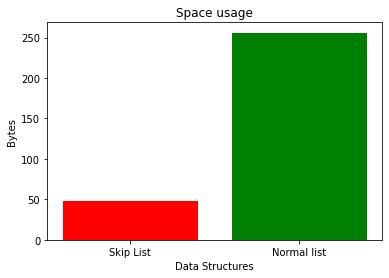

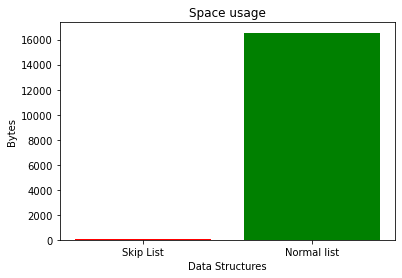

In [14]:
skip_list = SkipList(3, 0.5)
word_present = ['abound','abounds','abundance','abundant','accessable','bloom','blossom','bolster','bonny','bonus','bonuses',
                'coherent','cohesive','colorful','comely','comfort','gems','generosity','generous','generously','genial']            
elements_to_add = [str(x) for x in range(-1000, 1000, 1)]

plot_skip_list(word_present, skip_list)
plot_skip_list(elements_to_add, skip_list)

What are the advantages and disadvantages of the skip list?
### Advantages and disadvantages of the Skip List
#### Advantages
1. Because there aren't any rotations in the skip list, you could insert a new node very fast.
2. Compared to other data strctures as hash tables or binary search trees, the skip list is simpler to implement. 
3. It stores the nodes in a sorted form and thats' why it is easier to find the wanted node.
4. Its' algorithm could be modified easily in other structures.
5. It is very reliable list.

#### Disadvantages
1. Requires more memory than the balanced tree.
2. You can't do reversed searching, because it is not supported.
3. The skip list searches the node much slower than the linked list.

<br>And finally the applications of it.
### Applications of the Skip List
1. It is used in distributed applications, and it represents the pointers and system in the distributed applications.
2. It is used to implement a dynamic elastic concurrent queue with low lock contention.
3. It is also used with the QMap template class.
4. The indexing of the skip list is used in running median problems.
5. The skip list is used for the delta-encoding posting in the Lucene search.

Oops, lets not forget to compare them.
### Comparing Bloom Filter and Skip List with another non-probabilistic data structure
I chose to compare the Bloom Filter and Skip List with HashTable. But first, let me introduce you what is a hash table.

#### What is a Hash Table.
HashTable is a data strucuture, which stores key-value pairs (like dicitionaries in python). The way it works is that the key is sent to a hash function, which performs arithhmetic operations on it and after that they return the hash value, which is used as the index for accessing the key-value pair in the hash table.

1. How do they store objects?
    * HashTable store objects by their index.
    * Bloom Filter don't store the objects. He tells only if the object is present or not.
    * Skip List stores objects in nodes, which are positioned in layers.
2. How much space do they take?
    * Because of the fact that all string must map to ceratin location, HashTables are less space efficient.
    * Because Bloom Filters are just an arrays of 0s and 1s, they are more space efficient.
    * Skip Lists are also very space efficient, because of its structure. 
3. How accurate are they?
    * HashTables give more accurate results.
    * Bloom Filters have small false positive probability.
    * Skip Lists are also very accurate.
4. Do they support deletion operations?
    * HashTables support deletion, as they mark the object location as NULL. 
    * Bloom Filters don't support deletion. If you want to delete an item, you need to restart the filter.
    * Skip Lists, support deletions, as it is rearranging itself after the deletion.
5. How do they deal with collisions?
    * HashTables have to minimize the collisions, so you must choose multiple hashes or a strong hash.
    * There is no need to handle collisions, as the Bloom Filter is using many hash functions.
    * They deal as they update the node with the new one.
6. What are they used for?
    * Hashmaps are used in compiler operations, programming languages(hash table based data structures),password verification, etc.
    * Bloom Filters have application in network routers, in web browsers(detecting malicious URLs),in existing username checkers, in password checkers etc.
    * Skip Lists are used in distributed applications, representing the pointers and system in the distributed applications; implementing a dynamic elastic concurrent queue with low lock contention and other.

### 13. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide: 
* ~~What is a data structure?~~
* ~~What is a probabilistic data structure?~~
    * Where does the probabilistic behaviour emerge?
    * ~~What advantages do these structures provide?~~
* ~~For your chosen structure, how is it constructed?~~
    * ~~What parts do you need? What are the details?~~
* ~~How does the structure work?~~
    * ~~What operations can you do?~~
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)